<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-6/blob/main/Homework_6_Problem_1_a_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6
#Problem1-a
#Ahmed Elshazly
#801420724

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import time
from datetime import timedelta

In [ ]:
file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:

def fur_map(x):
    return {'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1}.get(x, x)

housing['furnishingstatus'] = housing['furnishingstatus'].map(fur_map)

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
housing[varlist] = housing[varlist].apply(binary_map)



In [ ]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus']
housing[num_vars] = stander.fit_transform(housing[num_vars])
Y=housing.pop("price")
X=housing
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
X = torch.tensor(X.values)
Y = torch.tensor(Y.values)
n_samples=X.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_X=X[train_indices]
train_Y=Y[train_indices]

val_X=X[val_indices]
val_Y=Y[val_indices]

train_X = train_X.float()
val_X = val_X.float()
train_Y = train_Y.float()
val_Y = val_Y.float()

In [ ]:
train_X.shape[1]

12

In [ ]:
def train (n_epochs, model, optimizer, loss_fn, x_train, y_train, x_val, y_val):
  train_rmse_list = []
  val_rmse_list = []
  for epoch in range(n_epochs+1):
    train_x_p=model(x_train)
    train_loss=loss_fn(train_x_p,y_train)

    with torch.no_grad():
      val_x_p=model(x_val)
      val_loss=loss_fn(val_x_p,y_val)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_rmse = torch.sqrt(train_loss).detach().item()
    train_rmse_list.append(train_rmse)
    val_rmse = torch.sqrt(val_loss).detach().item()
    val_rmse_list.append(val_rmse)

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training RMSE {train_rmse:.4f}, Validation RMSE {val_rmse:.4f}")

  return train_rmse_list, val_rmse_list

In [ ]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Training RMSE 5138165.5000, Validation RMSE 5046406.5000
Epoch 500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 1000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 1500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 2000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 2500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 3000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 3500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 4000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 4500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 5000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Training time for learning rate 0.01: 0:00:06.835038
Model with learning rate 0.01:
  Total parameters: 113
  Trainable parameters: 113


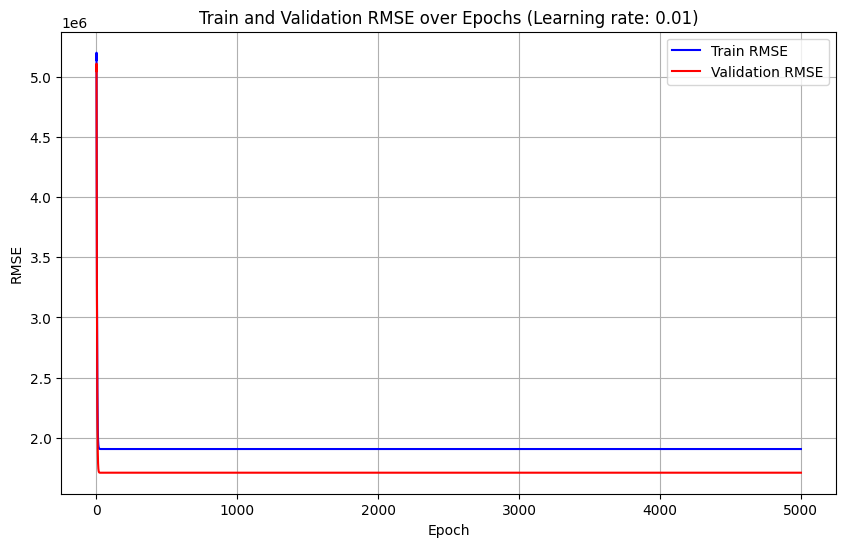

In [ ]:
number_of_epochs=5000
learning_rate=0.01
linear_model = nn.Sequential(
    nn.Linear(train_X.shape[1], 8),
    nn.Tanh(),
    nn.Linear(8, 1)
)
optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
start_time = time.time()
train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      loss_fn=nn.MSELoss(),
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
# Print the training time
print(f"Training time for learning rate {learning_rate}: {formatted_time}")
total_params, trainable_params = get_model_size(linear_model)
print(f"Model with learning rate {learning_rate}:")
print(f"  Total parameters: {total_params}")
print(f"  Trainable parameters: {trainable_params}")
#print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
plt.figure(figsize=(10, 6))
plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
plt.legend()
plt.grid(True)
plt.show()

Epoch 0, Training RMSE 5138164.5000, Validation RMSE 5046405.5000
Epoch 500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 1000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 1500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 2000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 2500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 3000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 3500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 4000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 4500, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Epoch 5000, Training RMSE 1906413.3750, Validation RMSE 1709703.7500
Training time for learning rate 0.1: 0:00:07.573354
Model with learning rate 0.1:
  Total parameters: 113
  Trainable parameters: 113


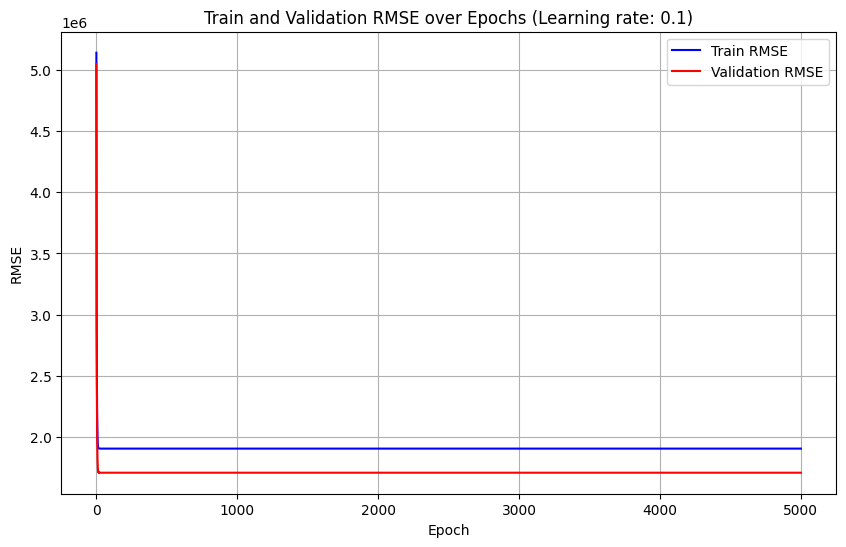

Epoch 0, Training RMSE 5138165.0000, Validation RMSE 5046406.0000
Epoch 500, Training RMSE 1907024.6250, Validation RMSE 1709729.3750
Epoch 1000, Training RMSE 1906932.7500, Validation RMSE 1709727.2500
Epoch 1500, Training RMSE 1906854.7500, Validation RMSE 1709725.3750
Epoch 2000, Training RMSE 1906788.3750, Validation RMSE 1709723.6250
Epoch 2500, Training RMSE 1906732.1250, Validation RMSE 1709722.0000
Epoch 3000, Training RMSE 1906684.1250, Validation RMSE 1709720.6250
Epoch 3500, Training RMSE 1906643.3750, Validation RMSE 1709719.1250
Epoch 4000, Training RMSE 1906608.7500, Validation RMSE 1709718.0000
Epoch 4500, Training RMSE 1906579.5000, Validation RMSE 1709716.8750
Epoch 5000, Training RMSE 1906554.5000, Validation RMSE 1709715.8750
Training time for learning rate 0.01: 0:00:07.844510
Model with learning rate 0.01:
  Total parameters: 113
  Trainable parameters: 113


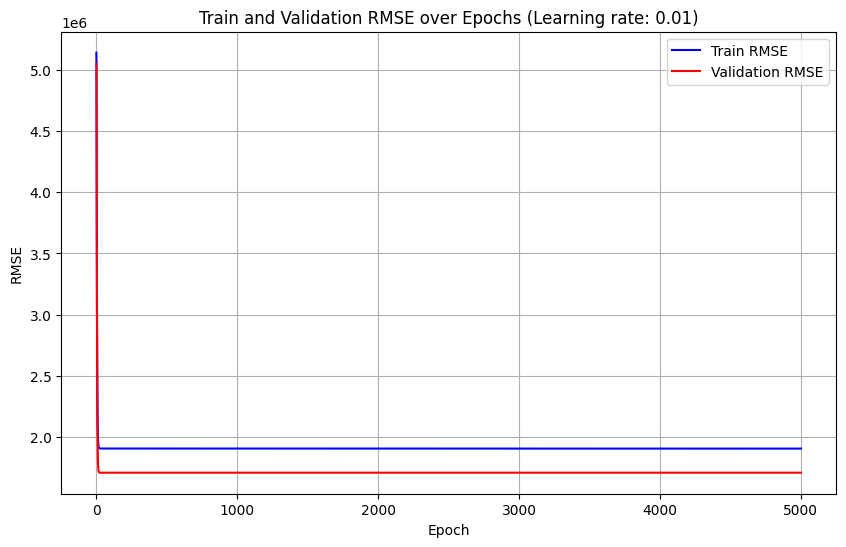

Epoch 0, Training RMSE 5138165.0000, Validation RMSE 5046406.0000
Epoch 500, Training RMSE 1906413.3750, Validation RMSE 1712519.0000
Epoch 1000, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 1500, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 2000, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 2500, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 3000, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 3500, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 4000, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 4500, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Epoch 5000, Training RMSE 1906413.3750, Validation RMSE 1712523.8750
Training time for learning rate 0.001: 0:00:06.756712
Model with learning rate 0.001:
  Total parameters: 113
  Trainable parameters: 113


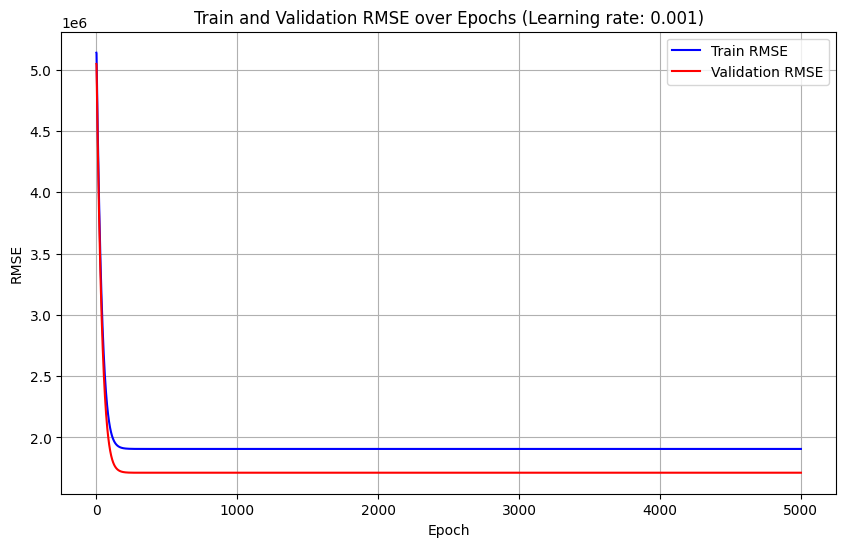

Epoch 0, Training RMSE 5138165.5000, Validation RMSE 5046406.0000
Epoch 500, Training RMSE 2720802.2500, Validation RMSE 2569169.5000
Epoch 1000, Training RMSE 2063081.7500, Validation RMSE 1872990.0000
Epoch 1500, Training RMSE 1933143.5000, Validation RMSE 1735146.2500
Epoch 2000, Training RMSE 1910850.5000, Validation RMSE 1712873.7500
Epoch 2500, Training RMSE 1907146.3750, Validation RMSE 1709797.8750
Epoch 3000, Training RMSE 1906534.2500, Validation RMSE 1709544.7500
Epoch 3500, Training RMSE 1906433.2500, Validation RMSE 1709606.6250
Epoch 4000, Training RMSE 1906416.6250, Validation RMSE 1709659.0000
Epoch 4500, Training RMSE 1906414.0000, Validation RMSE 1709684.6250
Epoch 5000, Training RMSE 1906413.6250, Validation RMSE 1709695.6250
Training time for learning rate 0.0001: 0:00:07.818737
Model with learning rate 0.0001:
  Total parameters: 113
  Trainable parameters: 113


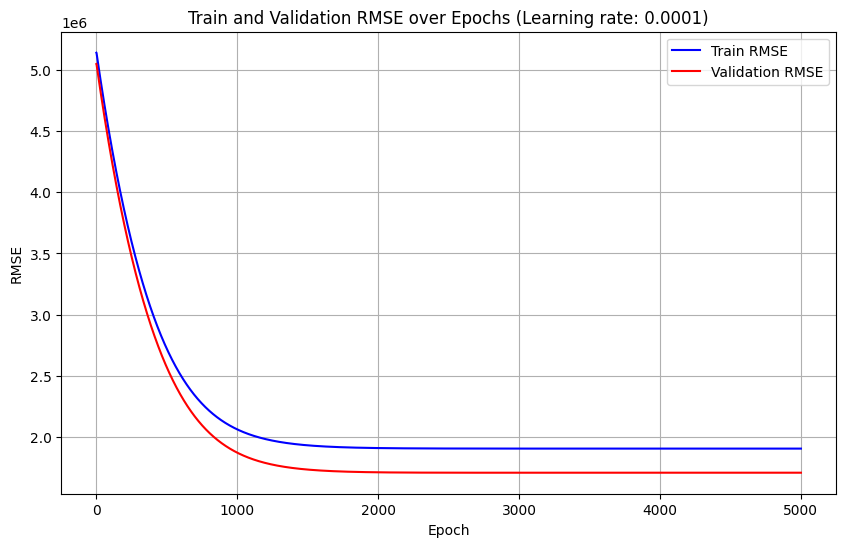

In [ ]:
number_of_epochs=5000
learning_rates=[0.1,0.01,0.001,0.0001]

for learning_rate in learning_rates:
    linear_model = nn.Sequential(
    nn.Linear(train_X.shape[1], 8),
    nn.Tanh(),
    nn.Linear(8, 1)
  )
    optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
    start_time = time.time()

    train_rmse, val_rmse=train(
          n_epochs=number_of_epochs,
          model=linear_model,
          optimizer=optimizer,
          loss_fn=nn.MSELoss(),
          x_train=train_X,
          y_train=train_Y,
          x_val=val_X,
          y_val=val_Y
      )
    end_time = time.time()
    elapsed_time = end_time - start_time
    formatted_time = str(timedelta(seconds=elapsed_time))

    # Print the training time
    print(f"Training time for learning rate {learning_rate}: {formatted_time}")
    total_params, trainable_params = get_model_size(linear_model)
    print(f"Model with learning rate {learning_rate}:")
    print(f"  Total parameters: {total_params}")
    print(f"  Trainable parameters: {trainable_params}")
    #print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
    plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
    plt.legend()
    plt.grid(True)
    plt.show()